In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline  
%config InlineBackend.figure_format = 'png'
pd.options.display.max_columns = None

_seed = 42

### Описание

Пример кластерного анализа по данным керна <br>
Датасет Lindquist, 1988 скачан отсюда https://pubs.usgs.gov/of/2003/ofr-03-420/ofr-03-420.html

### Списки названий столбцов

In [2]:
NUM_COLS = ["Depth", "Porosity", "Permeability"]
NEW_COLS1 = ["Log(Perm)"]
NEW_COLS2 = ["Log(Perm)", "RQI", "NPI", "Log(RQI)", "Log(NPI)"]

CAT_COLS = ["Bedding", "Zone"]

### Чтение данных

In [3]:
df = pd.read_excel("poroperm.xls")
df["Porosity"] = df["Porosity"] / 100

In [4]:
df.head(10)

,Depth,Permeability,Porosity,Bedding,Zone,Well
0,13647,0.09,0.066,1,2,1
1,13650,0.13,0.088,3,2,1
2,13654,0.09,0.074,2,2,1
3,13658,1.30,0.082,3,2,1
4,13662,0.12,0.068,2,2,1
5,13727,0.07,0.081,3,3,1
6,13731,0.06,0.087,2,3,1
7,13734,0.08,0.090,3,3,1
8,13742,0.07,0.085,3,3,1
9,13747,0.04,0.103,4,3,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Depth         1336 non-null   int64  
 1   Permeability  1336 non-null   float64
 2   Porosity      1336 non-null   float64
 3   Bedding       1336 non-null   int64  
 4   Zone          1336 non-null   int64  
 5   Well          1336 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


### Обзор данных

**Описательная статистика**

**Обзор категориальных признаков**

In [6]:
def countplt(df, target, feature):
    sns.countplot(x=feature, hue=target, data=df)
    plt.title(target + " vs " + feature)
    plt.legend(title=target, loc='upper right')
    plt.show()

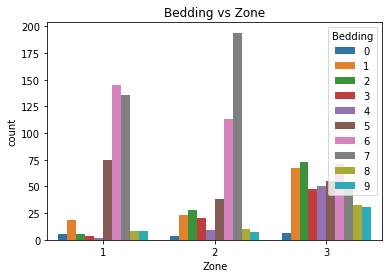

In [7]:
countplt(df, "Bedding", "Zone")

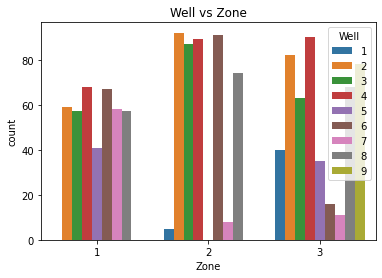

In [8]:
countplt(df, "Well", "Zone")

**Обзор количественных признаков**

Описательная статистика

In [9]:
df[NUM_COLS].describe()

,Depth,Porosity,Permeability
count,1336.000000,1336.000000,1336.000000
mean,13010.647455,0.093731,7.236557
std,766.955116,0.034494,43.942727
min,11848.000000,0.000000,0.010000
25%,12338.500000,0.067000,0.050000
50%,12852.000000,0.089000,0.130000
75%,13597.500000,0.116000,1.500000
max,14724.000000,0.195000,810.000000


Корреляционная матрица

In [10]:
corr = df[NUM_COLS].corr()
corr.style.background_gradient(cmap='coolwarm')

,Depth,Porosity,Permeability
Depth,1.000000,-0.200419,-0.139035
Porosity,-0.200419,1.000000,0.308905
Permeability,-0.139035,0.308905,1.000000


Добавление нового столбца Log(Perm)

In [11]:
df["Log(Perm)"] = np.log(df["Permeability"])

In [12]:
corr = df[NUM_COLS+NEW_COLS1].corr()
corr.style.background_gradient(cmap='coolwarm')

,Depth,Porosity,Permeability,Log(Perm)
Depth,1.000000,-0.200419,-0.139035,-0.235735
Porosity,-0.200419,1.000000,0.308905,0.841785
Permeability,-0.139035,0.308905,1.000000,0.433582
Log(Perm),-0.235735,0.841785,0.433582,1.000000


Матрица точечных кросс-плотов

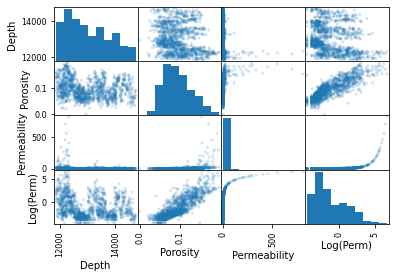

In [13]:
pd.plotting.scatter_matrix(df[NUM_COLS+NEW_COLS1], alpha=0.2)
plt.show()

Матрица точечных кросс-плотов в разрезе категориального признака Zone

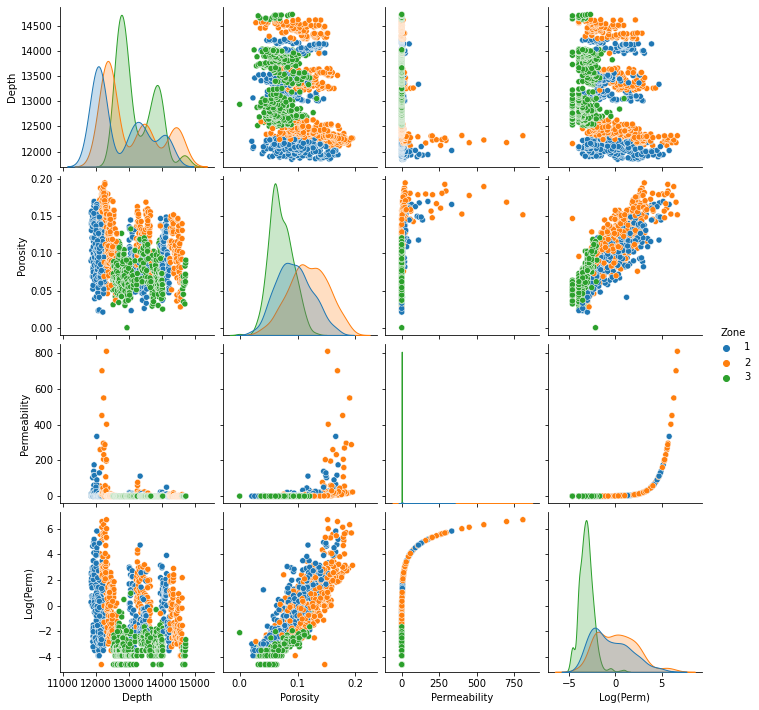

In [14]:
sns.pairplot(df[NUM_COLS+NEW_COLS1+["Zone"]], hue="Zone", palette="tab10")
plt.show()

**Обзор количественных признаков в разрезе категориальных признаков**

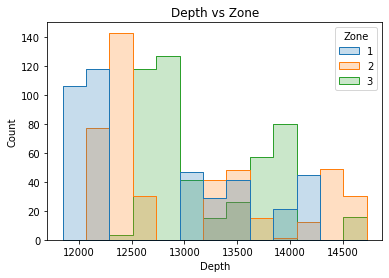

In [15]:
sns.histplot(data=df, x="Depth", hue="Zone", element="step", palette="tab10")
plt.title("Depth vs Zone")
plt.show()

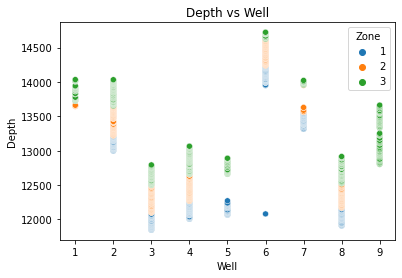

In [16]:
sns.scatterplot(data=df, x="Well", y="Depth", hue="Zone", palette="tab10")
plt.title("Depth vs Well")
plt.show()

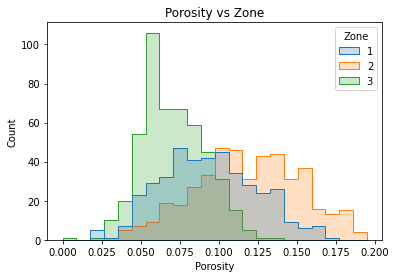

In [17]:
sns.histplot(data=df, x="Porosity", hue="Zone", element="step", palette="tab10")
plt.title("Porosity vs Zone")
plt.show()

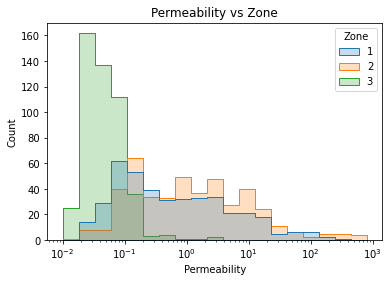

In [18]:
sns.histplot(data=df, x="Permeability", hue="Zone", element="step", log_scale=True, palette="tab10")
plt.title("Permeability vs Zone")
plt.show()

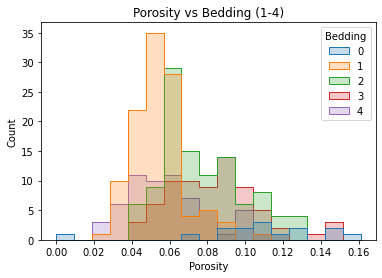

In [19]:
sns.histplot(data=df.loc[df["Bedding"] <= 4], x="Porosity", hue="Bedding", element="step", palette="tab10")
plt.title("Porosity vs Bedding (1-4)")
plt.show()

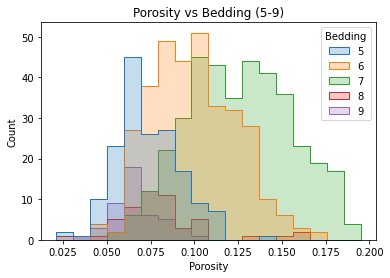

In [20]:
sns.histplot(data=df.loc[df["Bedding"] >= 5], x="Porosity", hue="Bedding", element="step", palette="tab10")
plt.title("Porosity vs Bedding (5-9)")
plt.show()

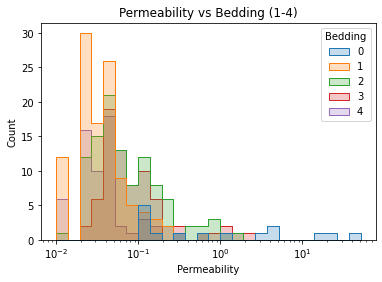

In [21]:
sns.histplot(data=df.loc[df["Bedding"] <= 4], x="Permeability", hue="Bedding", element="step", log_scale=True, palette="tab10")
plt.title("Permeability vs Bedding (1-4)")
plt.show()

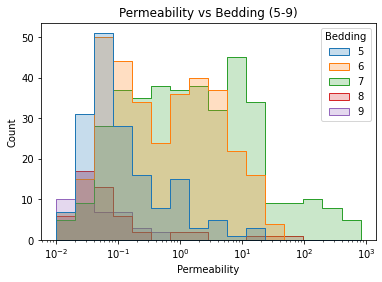

In [22]:
sns.histplot(data=df.loc[df["Bedding"] >= 5], x="Permeability", hue="Bedding", element="step", log_scale=True, palette="tab10")
plt.title("Permeability vs Bedding (5-9)")
plt.show()

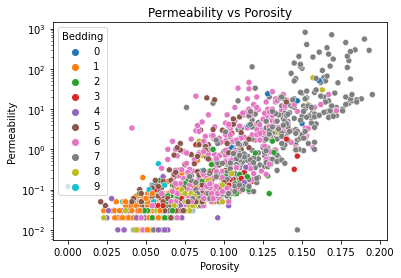

In [23]:
sns.scatterplot(data=df, x="Porosity", y="Permeability", hue="Bedding", palette="tab10")
plt.gca().set_yscale("log")
plt.title("Permeability vs Porosity")
plt.show()

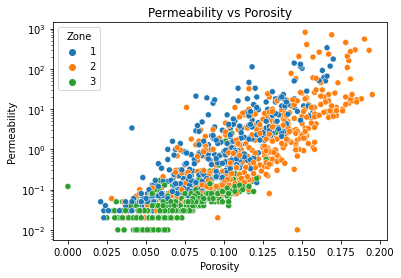

In [24]:
sns.scatterplot(data=df, x="Porosity", y="Permeability", hue="Zone", palette="tab10")
plt.gca().set_yscale("log")
plt.title("Permeability vs Porosity")
plt.show()

### Кластерный анализ методом K-средних

Для данного алгоритма требуется явно задавать количество кластеров (n_clusters).
https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85

In [25]:
from sklearn.cluster import KMeans

Исходный массив точек

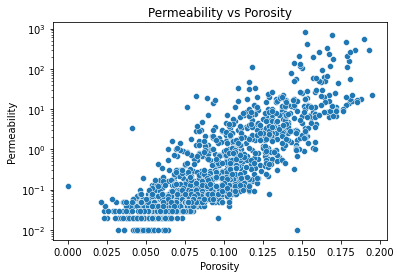

In [26]:
sns.scatterplot(data=df, x="Porosity", y="Permeability", palette="tab10")
plt.gca().set_yscale("log")
plt.title("Permeability vs Porosity")
plt.show()

Разбиение на 2 кластера по признакам Porosity и Permeability

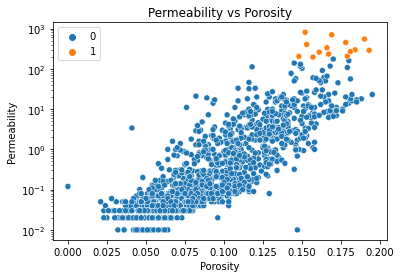

In [27]:
clf = KMeans(n_clusters=2, random_state=_seed)
clf.fit(df[["Porosity", "Permeability"]])
cl_pred = clf.predict(df[["Porosity", "Permeability"]])
sns.scatterplot(data=df, x="Porosity", y="Permeability", hue=cl_pred, palette="tab10")
plt.gca().set_yscale("log")
plt.title("Permeability vs Porosity")
plt.show()

Разбиение на 2 кластера по признакам Porosity и Log(Perm)

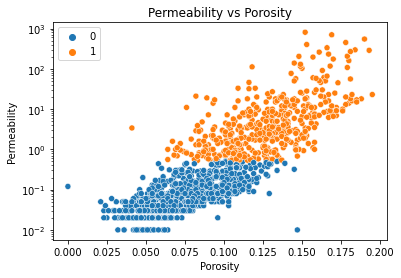

In [28]:
clf = KMeans(n_clusters=2, random_state=_seed)
clf.fit(df[["Porosity", "Log(Perm)"]])
cl_pred = clf.predict(df[["Porosity", "Log(Perm)"]])
sns.scatterplot(data=df, x="Porosity", y="Permeability", hue=cl_pred, palette="tab10")
plt.gca().set_yscale("log")
plt.title("Permeability vs Porosity")
plt.show()

**Для корректного проведения кластерного анализа требуется проведение нормализации признаков.**

### Нормализация

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df[["Porosity", "Log(Perm)"]]), columns=["Porosity", "Log(Perm)"])
df_norm.describe()

,Porosity,Log(Perm)
count,1.336000e+03,1.336000e+03
mean,3.914866e-16,1.344567e-16
std,1.000374e+00,1.000374e+00
min,-2.718307e+00,-1.482838e+00
25%,-7.752358e-01,-7.722273e-01
50%,-1.372124e-01,-3.503431e-01
75%,6.458163e-01,7.294938e-01
max,2.936900e+00,3.507393e+00


Разбиение на 2 кластера по нормализованным признакам Porosity и Log(Perm)

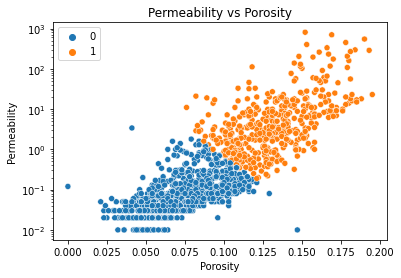

In [31]:
clf = KMeans(n_clusters=2, random_state=_seed)
clf.fit(df_norm)
cl_pred = clf.predict(df_norm)
sns.scatterplot(data=df, x="Porosity", y="Permeability", hue=cl_pred, palette="tab10")
plt.gca().set_yscale("log")
plt.title("Permeability vs Porosity")
plt.show()

Разбиение на 2 кластера по нормализованным признакам Porosity и Log(Perm)

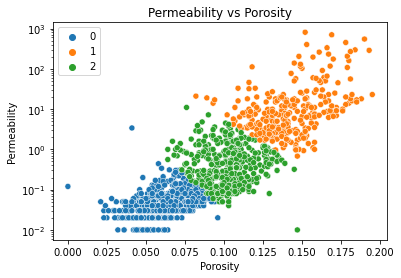

In [32]:
clf = KMeans(n_clusters=3, random_state=_seed)
clf.fit(df_norm)
cl_pred = clf.predict(df_norm)
sns.scatterplot(data=df, x="Porosity", y="Permeability", hue=cl_pred, palette="tab10")
plt.gca().set_yscale("log")
plt.title("Permeability vs Porosity")
plt.show()

Разбиение на 10 кластеров по нормализованным признакам Porosity и Log(Perm)

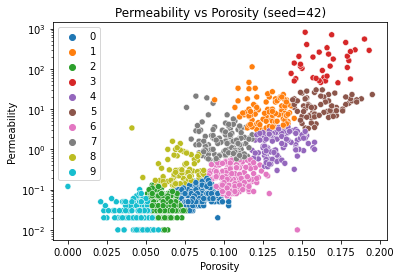

In [33]:
clf = KMeans(n_clusters=10, random_state=_seed)
clf.fit(df_norm)
cl_pred = clf.predict(df_norm)
sns.scatterplot(data=df, x="Porosity", y="Permeability", hue=cl_pred, palette="tab10")
plt.gca().set_yscale("log")
plt.title("Permeability vs Porosity (seed=42)")
plt.show()

График ошибки от количества кластеров <br>
В качестве ошибки принимается сумма квадратов растояний точек до кластерного центра (характеристика сплотченности).

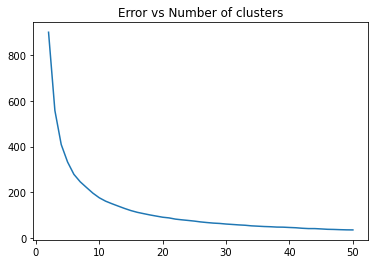

In [34]:
err = [KMeans(n_clusters=n, random_state=_seed).fit(df_norm).inertia_ for n in range(2, 51)]
plt.plot(range(2, 51), err)
plt.title("Error vs Number of clusters")
plt.show()

### Кластерный анализ по методике Flow Zone Rock Typing методом К-средних

In [35]:
df = df.loc[df["Porosity"] > 0, :]

Вычисление новых признаков NPI и RQI

In [36]:
df["RQI"] = 0.0314 * np.sqrt(df["Permeability"] / df["Porosity"])
df["NPI"] = df["Porosity"] / (1 - df["Porosity"])

In [37]:
df["Log(RQI)"] = np.log(df["RQI"])
df["Log(NPI)"] = np.log(df["NPI"])

In [38]:
df.head(10)

,Depth,Permeability,Porosity,Bedding,Zone,Well,Log(Perm),RQI,NPI,Log(RQI),Log(NPI)
0,13647,0.09,0.066,1,2,1,-2.407946,0.036667,0.070664,-3.305870,-2.649822
1,13650,0.13,0.088,3,2,1,-2.040221,0.038165,0.096491,-3.265849,-2.338303
2,13654,0.09,0.074,2,2,1,-2.407946,0.034629,0.079914,-3.363075,-2.526809
3,13658,1.30,0.082,3,2,1,0.262364,0.125024,0.089325,-2.079247,-2.415478
4,13662,0.12,0.068,2,2,1,-2.120264,0.041712,0.072961,-3.176955,-2.617825
5,13727,0.07,0.081,3,3,1,-2.659260,0.029190,0.088139,-3.533924,-2.428837
6,13731,0.06,0.087,2,3,1,-2.813411,0.026076,0.095290,-3.646729,-2.350828
7,13734,0.08,0.090,3,3,1,-2.525729,0.029604,0.098901,-3.519839,-2.313635
8,13742,0.07,0.085,3,3,1,-2.659260,0.028495,0.092896,-3.558025,-2.376273
9,13747,0.04,0.103,4,3,1,-3.218876,0.019568,0.114827,-3.933872,-2.164327


Корреляционная матрица

In [39]:
corr = df[NUM_COLS+NEW_COLS2].corr()
corr.style.background_gradient(cmap='coolwarm')

,Depth,Porosity,Permeability,Log(Perm),RQI,NPI,Log(RQI),Log(NPI)
Depth,1.000000,-0.201168,-0.139048,-0.235776,-0.214240,-0.203964,-0.233992,-0.190530
Porosity,-0.201168,1.000000,0.309436,0.843384,0.566169,0.998979,0.778994,0.978640
Permeability,-0.139048,0.309436,1.000000,0.433564,0.871781,0.322637,0.449227,0.256379
Log(Perm),-0.235776,0.843384,0.433564,1.000000,0.764161,0.846306,0.993095,0.803714
RQI,-0.214240,0.566169,0.871781,0.764161,1.000000,0.580029,0.782163,0.498390
NPI,-0.203964,0.998979,0.322637,0.846306,0.580029,1.000000,0.784389,0.969071
Log(RQI),-0.233992,0.778994,0.449227,0.993095,0.782163,0.784389,1.000000,0.728397
Log(NPI),-0.190530,0.978640,0.256379,0.803714,0.498390,0.969071,0.728397,1.000000


Исходный массив точек

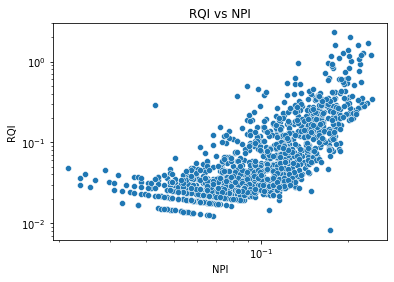

In [40]:
sns.scatterplot(data=df, x="NPI", y="RQI", palette="tab10")
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.title("RQI vs NPI")
plt.show()

Нормализация признаков

In [41]:
scaler = StandardScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df[["Log(RQI)", "Log(NPI)"]]), columns=["Log(RQI)", "Log(NPI)"])
df_norm.describe()

,Log(RQI),Log(NPI)
count,1.335000e+03,1.335000e+03
mean,2.079069e-16,7.180274e-16
std,1.000375e+00,1.000375e+00
min,-1.965403e+00,-3.574880e+00
25%,-7.702296e-01,-7.037174e-01
50%,-3.573479e-01,2.769354e-02
75%,7.179029e-01,7.287689e-01
max,3.744888e+00,2.185441e+00


Разбиение на 2 кластера по нормализованным признакам Log(RQI) и Log(NPI)

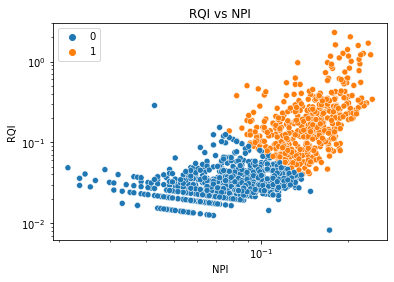

In [42]:
clf = KMeans(n_clusters=2, random_state=_seed)
clf.fit(df_norm)
cl_pred = clf.predict(df_norm)
sns.scatterplot(data=df, x="NPI", y="RQI", hue=cl_pred, palette="tab10")
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.title("RQI vs NPI")
plt.show()

Результат разбиения на 2 кластера на исходном графике Porosity vs Permeability

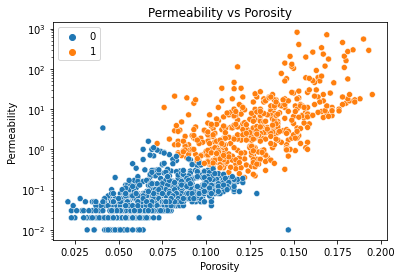

In [43]:
sns.scatterplot(data=df, x="Porosity", y="Permeability", hue=cl_pred, palette="tab10")
plt.gca().set_yscale("log")
plt.title("Permeability vs Porosity")
plt.show()

График ошибки от количества кластеров <br>
В качестве ошибки принимается сумма квадратов растояний точек до кластерного центра (характеристика сплотченности).

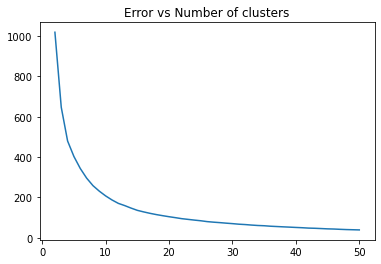

In [44]:
err = [KMeans(n_clusters=n, random_state=_seed).fit(df_norm).inertia_ for n in range(2, 51)]
plt.plot(range(2, 51), err)
plt.title("Error vs Number of clusters")
plt.show()

**Таким образом, приведен пример предварительной обработки признаков и кластерного анализа методом К-средних. <br>
Пример нельзя рассматривать в качестве решения реальной задачи.**